In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [46]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [47]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

In [48]:
X

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2
5,2.9,23.0
6,3.0,23.0
7,3.2,23.3
8,3.2,23.3
9,3.7,23.6


In [49]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(30, 2)
(30,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# First we will devide the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 2)
(20,)
(10, 2)
(10,)


In [53]:
df_exp = X_train
df_exp

,YearsExperience,Age
4,2.2,22.2
16,5.1,26.0
5,2.9,23.0
13,4.1,24.0
11,4.0,24.0
22,7.9,31.0
1,1.3,21.5
2,1.5,21.7
25,9.0,34.0
3,2.0,22.0


In [54]:
X_test

,YearsExperience,Age
27,9.6,36.0
15,4.9,25.0
23,8.2,32.0
17,5.3,27.0
8,3.2,23.3
9,3.7,23.6
28,10.3,37.0
24,8.7,33.0
12,4.0,24.0
0,1.1,21.0


# Min-Max Scaler

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Create the object

minmax_scale = MinMaxScaler()

# fit on the train dataset

minmax_scale.fit((df_exp))

# transform the train dataset columns ("YearsExperience" and "Age")

df_exp_minmax = minmax_scale.transform(df_exp)
print(type(df_exp_minmax))
df_exp_minmax_new = pd.DataFrame(df_exp_minmax,columns=["YearsExperience","Age"])

df_exp_minmax_new

<class 'numpy.ndarray'>


,YearsExperience,Age
0,0.097826,0.042424
1,0.413043,0.272727
2,0.173913,0.090909
3,0.304348,0.151515
4,0.293478,0.151515
5,0.717391,0.575758
6,0.000000,0.000000
7,0.021739,0.012121
8,0.836957,0.757576
9,0.076087,0.030303


In [59]:
# To avoid the data leakage we fisrt split the dataset then wecreate object and fit of train dataset
# and use that fit to transform the test dataset
# transform the test dataset using train dataset fit ("Experience" and "Salary")

X_test_minmax = minmax_scale.transform(X_test)
print(type(X_test_minmax))
df_test_minmax_new = pd.DataFrame(X_test_minmax,columns=["YearsExperience","Age"])
df_test_minmax_new

<class 'numpy.ndarray'>


,YearsExperience,Age
0,0.902174,0.878788
1,0.391304,0.212121
2,0.750000,0.636364
3,0.434783,0.333333
4,0.206522,0.109091
5,0.260870,0.127273
6,0.978261,0.939394
7,0.804348,0.696970
8,0.293478,0.151515
9,-0.021739,-0.030303


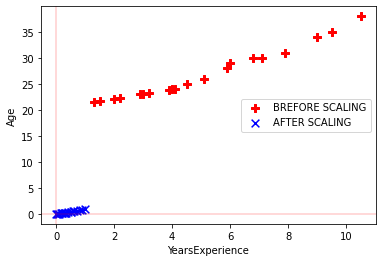

In [60]:
ax = df_exp.plot.scatter(x="YearsExperience", y="Age",marker = "P",s=80, label='BREFORE SCALING',color='red')
df_exp_minmax_new.plot.scatter(x="YearsExperience", y="Age",marker = "x",s=60,label='AFTER SCALING',
                               color='blue', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

# Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
# create the object
std_scale = StandardScaler()

# fit and transform the columns ("Experience" and "Salary")
df_exp_std = std_scale.fit_transform(df_exp.iloc[:,0:2])

print(type(df_exp_std))
df_exp_std_new = pd.DataFrame(df_exp_std,columns=["YearsExperience","Age"])
df_exp_std_new

<class 'numpy.ndarray'>


,YearsExperience,Age
0,-1.058059,-0.948473
1,0.030016,-0.152844
2,-0.795420,-0.780972
3,-0.345182,-0.571596
4,-0.382702,-0.571596
5,1.080571,0.894035
6,-1.395737,-1.095036
7,-1.320698,-1.053161
8,1.493289,1.522163
9,-1.133099,-0.990348


In [66]:
print("std: ",round(df_exp_std_new.YearsExperience.std(),0))
print("mean: ",round(df_exp_std_new.YearsExperience.mean(),2))

std:  1.0
mean:  -0.0


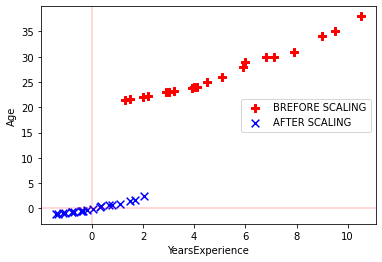

In [67]:
ax = df_exp.plot.scatter(x="YearsExperience", y="Age",marker = "P",s=80, label='BREFORE SCALING',color='red')
df_exp_std_new.plot.scatter(x="YearsExperience", y="Age",marker = "x",s=60,label='AFTER SCALING',
                               color='blue', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)